# Final Project

You will be asked to download data by yourselves and answer several data science questions through this final project. This project has two parts.


## Part 1 (15 Points):

This part contains 10 different data science questions that you are asked to answer. You need to download the corresponding data and write code to process the data to answer these questions. For each question, you need to provide your code to anser this question, as well as final answers. Each question will be worth 1.5 points in this part. 


## Final Submission:

Your final submission will contain two files:

1. The first would be this notebook. You need to provide code for your answers as well as your answers. You also need to provide visualization and executive summary using Markdown in this notebook. 

2. The second is the html version of this notebook. 


## Part 1

First, you need to download the most recent datasets containing listing and reviews in **Los Angeles** from [insidearibnb.com](http://insideairbnb.com/get-the-data.html). (September,2019,detailed data)You will then need to provide the code as well as answers to the following questions.

**To make sure that you downloaded the right dataset, your solution to Question 1 should be:**
1. **Number of unique listings = 45053**
2. **Number of unique hosts = 26286**

### Question 1: How many unique listings are there in the LA dataset? How many unique hosts are there?
**Question 1 Answer:**

There are 45053 unique listings, and 26286 unique hosts in the LA dataset.

First, I read the listings csv using pandas and store it as the dataframe called dfl.
Then I use nuinque to find the number of unique id and the host_id.

In [1]:
# You need to provide the code to answer the previous quesiton
# (you should also briefly explain your data structure -- 
# where do you put your data and how you get your data)

! pip install pandasql
import pandas as pd
file_location = "listings.csv"
dfl = pd.read_csv(file_location)
a = dfl.id.nunique()
b = dfl.host_id.nunique()

a,b

You are using pip version 19.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(45053, 26286)

### Question 2: What is the mean, median, standard deviation, minimum and maximum of the number of listings per host in LA? (for each host, you only need to consider the listings from LA)
**Question 2 Answer:**

The mean of the number of listings per host in LA is 1.663651.

The median of the number of listings per host in LA is 1.

The standard deviation of the number of listings per host in LA is 2.900262.

The minimum of the number of listings per host in LA is 1.

The maximum of the number of listings per host in LA is 137.

In [2]:
# You need to provide the code to answer the previous quesiton

import numpy as np
from pandasql import sqldf

#dfl= sqldf("SELECT * FROM df WHERE city = 'Los Angeles'")
df_q2 = sqldf("SELECT host_id, count(id) AS Count FROM dfl WHERE city = 'Los Angeles' GROUP BY host_id")

df_q2.Count.describe()

count    16688.000000
mean         1.663651
std          2.900262
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        137.000000
Name: Count, dtype: float64

### Question 3: What is the average and standard deviation number of listings for a super host versus a non-super host? Does super host or non-super host have more listings on average?
**Question 3 Answer:**

For a super host, the average number of listings is 1.82,
and the standard deviation number of listings is 3.18.

For a non-super host, the average number of listings is 1.67,
and the standard deviation number of listings is 2.93.

In [3]:
# You need to provide the code to answer the previous quesiton

df1 = dfl.loc[dfl.host_is_superhost == "t", ["id","host_id","host_is_superhost"]]
df2 = dfl.loc[dfl.host_is_superhost == "f", ["id","host_id","host_is_superhost"]]
df_1 = df1.groupby(by = ["host_id"])["id"].agg({"id":"count"}).reset_index()
df_2 = df2.groupby(by = ["host_id"])["id"].agg({"id":"count"}).reset_index()
D = {}
D["Super_Host"] = [round(df_1.id.mean(),2), round(df_1.id.std(),2)]
D["Non-Super_Host"] = [round(df_2.id.mean(),2), round(df_2.id.std(),2)]
D

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


{'Super_Host': [1.82, 3.18], 'Non-Super_Host': [1.67, 2.93]}

### Question 4: What are the unique types of host verifications are there? (It doesn't matter if you include "None" or empty string as a type)
**Question 4 Answer:**

There are 22 unique types of host verifications (including 'None' and an empty string):

'email','phone','facebook','reviews','kba','jumio','government_id','offline_government_id','selfie',
'identity_manual',
work_email',
'manual_online',
'manual_offline','google','','sent_id','None','sesame',
'sesame_offline','photographer','zhima_selfie','weibo'.

In [4]:
# You need to provide the code to answer the previous quesiton

Uniquetype=[]
for index, row in dfl.iterrows(): 
    c=row.host_verifications.strip("['']").split("', '")
    for i in range(0,len(c)):
        if c[i] not in Uniquetype:
            Uniquetype.append(c[i])
Uniquetype

['email',
 'phone',
 'facebook',
 'reviews',
 'kba',
 'jumio',
 'government_id',
 'offline_government_id',
 'selfie',
 'identity_manual',
 'work_email',
 'manual_online',
 'manual_offline',
 'google',
 '',
 'sent_id',
 'None',
 'sesame',
 'sesame_offline',
 'photographer',
 'zhima_selfie',
 'weibo']

### Question 5: What are the five most popular verification types of hosts? For each type of the top five verifications, how many percent of hosts verify that type?
**Question 5 Answer:**

The five most popular verification types of hosts are phone , email , reviews , government_id and jumio.

99.68 percent of hosts verify phone.
93.84 percent of hosts verify email.
68.85 percent of hosts verify reviews.
58.77 percent of hosts verify government_id.
43.34 percent of hosts verify jumio.

In [5]:
# You need to provide the code to answer the previous quesiton

from pandasql import sqldf
df_ver = sqldf("SELECT distinct host_id, host_verifications FROM dfl")

d = {}
for i in Uniquetype:
    d[i] = 0
for index, row in df_ver.iterrows(): 
    c = row.host_verifications.strip("['']").split("', '")
    for i in c:
        for y in Uniquetype:
            if i == y:
                d[y] += 1

sort_d = sorted(d.items(), key = lambda kv:(kv[1],kv[0]), reverse = True)
print("The top five verifications are", sort_d[0][0], ",", \
      sort_d[1][0], ",", sort_d[2][0], ",", sort_d[3][0], "and", sort_d[4][0])
for i in range(0,5):
    print(round(sort_d[i][1]*100/df_ver.host_id.count(),2), "percent of hosts verify %s."%sort_d[i][0])

The top five verifications are phone , email , reviews , government_id and jumio
99.68 percent of hosts verify phone.
93.84 percent of hosts verify email.
68.85 percent of hosts verify reviews.
58.77 percent of hosts verify government_id.
43.34 percent of hosts verify jumio.


### Question 6: What is the mean, standard deviation of the average price of a listing in Los Angles from 01/01/2020 to 03/01/2020 (inclusive)? (For listings that are not available in this time, you should not count them in the average price.)

**Question 6 Answer:**

The mean of the average price is 217.37, and the standard deviation of the average price is 576.82.

In [6]:
# You need to provide the code to answer the previous quesiton

from datetime import datetime as dt
df_c = pd.read_csv("calendar.csv")
df_c["date"] = pd.to_datetime(df_c["date"])

import datetime
d1 = datetime.date(2020,1,1)
d2 = datetime.date(2020,3,1)
df_c["price"] = df_c["price"].apply(lambda x:str(x)).apply(lambda x:x.replace(',','')).\
                              apply(lambda x:x.replace('$','')).apply(lambda x:float(x))

df6 = df_c[df_c["date"] >= d1][df_c["date"] <= d2]
df6 = df6.groupby("listing_id").agg("mean")["price"]
print("The mean of the average price is", round(df6.mean(),2), \
      "and the standard deviation of the average price is", round(df6.std(),2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  del sys.path[0]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


The mean of the average price is 217.37 and the standard deviation of the average price is 576.82


### Question 7: For reviews that are written in Jan, 2016, what are the most popular ten words except stopping words? What about reviews written in March, 2017 and April, 2018?
**Hint**: You need to use NTLK stopping words to find the stopping words in Python. You also need to remove punctuation and numbers

**Question 7 Answer:**

The most popular ten words for reviews that are written in Jan, 2016:
'great', 'stay', 'place', 'clean', 'location', 'house', 'us', 'nice', 'would', 'host'.

The most popular ten words for reviews that are written in March, 2017:
'great', 'place', 'stay', 'location', 'clean', 'nice', 'would', 'host', 'house', 'comfortable'.

The most popular ten words for reviews that are written in April, 2018:
'great', 'place', 'stay', 'location', 'clean', 'would', 'nice', 'host', 'house', 'la'.

In [7]:
# You need to provide the code to answer the previous quesiton

df_r = pd.read_csv("reviews.csv")
df_r["date"] = df_r["date"].apply(lambda x: dt.strptime(x,"%Y-%m-%d"))

import nltk
nltk.download("stopwords")
import re
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
time = [[1,2016],[3,2017],[4,2018]]

for x in time:
    df7 = df_r[df_r['date'].map(lambda x: x.month) == x[0]]
    df7 = df7[df7['date'].map(lambda x: x.year) == x[1]]
    b = {}
    for index, row in df7.iterrows():
        try: 
            a = row["comments"].split(' ')
        except AttributeError:
            continue
        for i in a:
            i = re.sub('[0-9]','',i) 
            i = re.sub(r'[^\w\s]','',i)
            i = i.lower()
            if i not in stopwords:
                if i not in b:
                    b[i] = 1
                else:
                    b[i] += 1
    b = sorted(b.items(), key=lambda d:d[1], reverse = True)
    b = b[1:]
    b = b[0:10]
    c = []
    for word in b:
        c.append(word[0])
    print(x,c)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/niecong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[1, 2016] ['great', 'stay', 'place', 'clean', 'location', 'house', 'us', 'nice', 'would', 'host']
[3, 2017] ['great', 'place', 'stay', 'location', 'clean', 'nice', 'would', 'host', 'house', 'comfortable']
[4, 2018] ['great', 'place', 'stay', 'location', 'clean', 'would', 'nice', 'host', 'house', 'la']


### Question 8: Which five zipcode has the highest average listing price and has at least 30 listings (again only considering available dates) between 2020-01-01 to 2020-02-01 (inclusive)? What are these listing prices? What are the number of active listings and number of hosts in these top five zipcodes (a listing is active if it has at least one available date in the calendar data)?

**Question 8 Answer:**

The five zipcodes are 90210, 90077, 90265, 90069, 91436.

For zipcode 90210, the corresponding listing price is 1963.557367, the number of active listings is 262, and the number of hosts is 346.

For zipcode 90077, the corresponding listing price is 1909.066130, the number of active listings is 68, and the number of hosts is 92.

For zipcode 90265, the corresponding listing price is 1559.605010, the number of active listings is 321, and the number of hosts is 412.

For zipcode 90069, the corresponding listing price is 998.113153, the number of active listings is 473, and the number of hosts is 563.

For zipcode 91436, the corresponding listing price is 742.660019, the number of active listings is 51, and the number of hosts is 59.

In [8]:
# You need to provide the code to answer the previous quesiton

from pandasql import sqldf
January = df_c.loc[(df_c['date'] <= '2020-02-01')&(df_c['date'] >= '2020-01-01')&\
                   (df_c['available'] == 't'),:].copy()

df_la = dfl[["id", "zipcode", "price","host_id"]].copy()
January["new_price"] = January["price"].replace('[\$,]','',regex = True).astype("float")

zipcode = sqldf("SELECT zipcode, avg(January.new_price) AS avg_price \
                 FROM January JOIN df_la on January.listing_id = df_la.id \
                 GROUP BY df_la.zipcode \
                 HAVING COUNT(DISTINCT listing_id) >= 30 \
                 ORDER BY avg_price DESC LIMIT 5")

code_list = zipcode["zipcode"].tolist()
df8 = df_c.merge(df_la, how = "inner", left_on = "listing_id", right_on = "id")

top5_zipcode_8 = zipcode.set_index("zipcode", inplace = False)
top5_8 = df8[df8["zipcode"].isin(code_list)]
top5_zipcode_8["num_of_hosts"] = top5_8.groupby(by = "zipcode").host_id.nunique()

df_8 = df8.loc[(df8["available"] == "t")]
Top = df_8[df_8["zipcode"].isin(code_list)]
top5_zipcode_8["num_of_listings"] = Top.groupby(by = "zipcode").listing_id.nunique()
top5_zipcode_8

,avg_price,num_of_hosts,num_of_listings
zipcode,,,
90210,1963.557367,262,346
90077,1909.066130,68,92
90265,1559.605010,321,412
90069,998.113153,473,563
91436,742.660019,51,59


### Question 9: Focusing on the data from 2020-01-01 to 2020-04-01 (inclusive), what are five zipcodes that have at least 30 listings and have the largest absolute difference between the average prices on weekends versus the average prices on weekdays? (Weekends = Saturday and Sunday). Please give the zipcodes as well as the listing prices
**Question 9 Answer:**

The five zipcodes are 91384, 90265, 91210, 89019 and 93563.

For zipcode 91384, the corresponding absolute difference between the average prices on weekends versus the average prices on weekdays is 48.015226.

For zipcode 90265, the corresponding absolute difference between the average prices on weekends versus the average prices on weekdays is 24.733803.

For zipcode 91210, the corresponding absolute difference between the average prices on weekends versus the average prices on weekdays is 23.473899.

For zipcode 89019, the corresponding absolute difference between the average prices on weekends versus the average prices on weekdays is 18.200000.

For zipcode 93563, the corresponding absolute difference between the average prices on weekends versus the average prices on weekdays is 15.922216.

In [10]:
# You need to provide the code to answer the previous quesiton

weekend = ['Saturday', 'Sunday']
weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday']

df_c['date'] = pd.to_datetime(df_c['date'])
begin_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2020-04-01')
df9 = df_c.loc[(df_c['date'] <= end_date)&(df_c['date'] >= begin_date),:]
df9 = df9[df9.available == 't']
df9['weekday'] = df9['date'].dt.weekday_name
la = dfl.loc[:,['id','zipcode']]
la.columns = ['listing_id', 'zipcode']
df9 = pd.merge(df9, la, on = 'listing_id', how = 'left')

count_listing = pd.DataFrame(df9.groupby(by = 'zipcode')['listing_id'].count())
count_listing = count_listing.reset_index()
count_listing = count_listing.loc[count_listing['listing_id'] >= 30,:]
count_listing.columns = ['zipcode', 'count']
df9 = pd.merge(count_listing, df9, on = 'zipcode', how = 'left')
df9["price"] = df9["price"].replace('[\$,]','',regex = True).astype("float")

df9_weekend = df9.loc[df9.weekday.isin(weekend),:]
df9_weekday = df9.loc[df9.weekday.isin(weekday),:]

weekend_9 = pd.DataFrame(df9_weekend.groupby(by = 'zipcode')['price'].mean())
weekday_9 = pd.DataFrame(df9_weekday.groupby(by = 'zipcode')['price'].mean())

zipcode_9 = pd.merge(weekday_9, weekend_9, on = 'zipcode')
zipcode_9['Difference'] = abs(zipcode_9.price_x-zipcode_9.price_y)
zipcode_9 = zipcode_9.sort_values(by = 'Difference', axis = 0, ascending = False)
zipcode_9 = zipcode_9.reset_index()

zipcode_9.loc[0:4,['zipcode','Difference']]

,zipcode,Difference
0,91384,48.015226
1,90265,24.733803
2,91210,23.473899
3,89019,18.200000
4,93563,15.922216


### Question 10: What is the average and standard deviation of the daily total capacity at Airbnb Los Angeles from 2020-01-01 to 2020-04-01? The daily total capacity in a day is the number of beds that are available in that given date. What is the average and standard deviation of the daily price per bed at Airbnb Los Angeles from 2020-01-01 to 2020-04-01?
**Question 10 Answer:**

The average of the daily total capacity is 46995.23, and standard deviation of the daily total capacity is 4980.64.

The average of the daily price per bed is 124.11, and standard deviation of the daily price per bed is 5.63.

In [11]:
# You need to provide the code to answer the previous quesiton
df10 = sqldf("SELECT id AS listing_id, AVG(beds) AS num_bed FROM dfl GROUP BY id")

df10_1 = df_c.loc[(df_c["date"] >= "2020-01-01")&(df_c["date"] <= "2020-04-01")&\
                  (df_c["available"] == "t")]
df10_2 = df10_1.merge(df10, how = "left", on = "listing_id")
df10_3 = sqldf('SELECT date, SUM(num_bed) AS SUM_BED, \
                (SUM(price)/SUM(num_bed)) AS PRICE_PER_BED FROM df10_2 GROUP BY date')

print(round(df10_3.SUM_BED.mean(),2), round(df10_3.SUM_BED.std(),2))
print(round(df10_3.PRICE_PER_BED.mean(),2), round(df10_3.PRICE_PER_BED.std(),2))

46995.23 4980.64
124.11 5.63


## Part 2 (15 Points):

In this part, you need to find **5** interesting business questions out of the datasets. You then need to write Python code to answer the questions. Last, you need to write a 200-word summary of your answers and business insights you get from ansewr these 5 questions baed on your code. You will be evaluated based on the following criterion:

1. You need to ask three business-relevant questions (2 points)
2. You need to answer these three questions using Python and the datasets (1 points)
3. You have at least **5** graphs to visualize your insights (2 points)
4. Your executive summary of your answers are well-written and make sense (5 points)
5. Your business insights are very interesting and the report is creative (5 points)

**(You need to use this cell to write your 5 questions)**

**Question 1:**      
Which 20 host neighbourhoods have the highest total housing prices (here we assume: total_price = price + cleaning_fee)? And which 20 host neighbourhoods have the lowest?

**Question 2:**      
Can factors such as Bathroom/person, Bedroom/person, Bed/person explain the price differennce in the above host neighbourhoods?

**Question 3:**      
Can you find a factor that may contribute to the price difference? What are your observations?

**Question 4:**      
What's the geographical distribution of Airbnb in LA? And what's the coordinate of its geographical center?

**Question 5:**      
We would like to extend special coupons to those who interacted most frequently with us over the past few years. Please find out 10 most active reviewers and rank their review activity.


In [12]:
# Question 1

dfl["price"] = dfl["price"].astype(str)
dfl["price"] = [x.replace('$','').replace(',','') for x in dfl["price"]]
dfl["cleaning_fee"] = dfl["cleaning_fee"].astype(str)
dfl["cleaning_fee"] = [x.replace('$','').replace(',','') for x in dfl["cleaning_fee"]]

total_price = []
for index, row in dfl.iterrows():
    p = float(row['price'])
    c = float(row['cleaning_fee'])
    total_p = p+c
    total_price.append(total_p)

dfl['total_price'] = total_price

In [13]:
# Question 1

import numpy as np
results = dfl.groupby(by = "host_neighbourhood").\
              apply(lambda dfl:pd.Series({"average_total_price":np.mean(dfl["total_price"])})).\
              reset_index()

high_results = results.sort_values(by = "average_total_price", ascending = False)[:20]
low_results = results.sort_values(by = "average_total_price", ascending = True)[:20]

Text(75.04697385947387, 15, 'Avg. Low Price = 72.05')

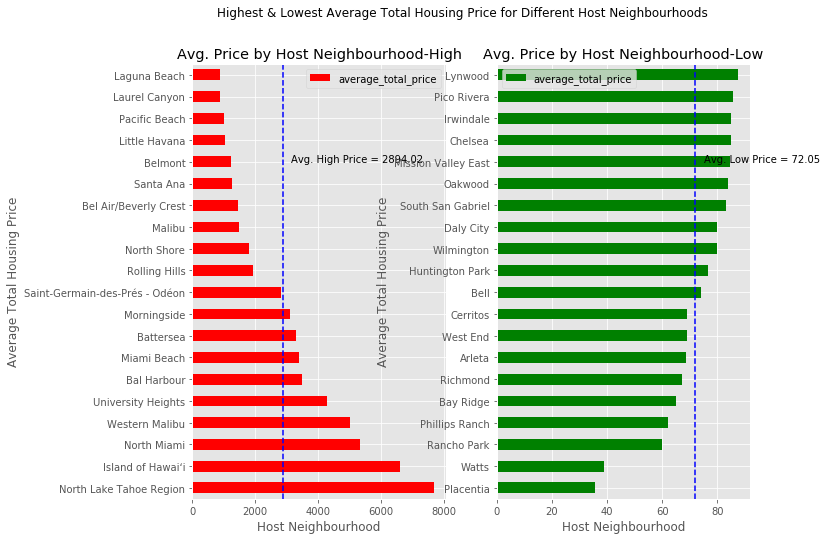

In [14]:
# Question 1

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (10,8), sharey = False)
fig.suptitle("Highest & Lowest Average Total Housing Price for Different Host Neighbourhoods")

high_results.plot(kind = "barh", x = "host_neighbourhood", y = "average_total_price", color = "r", ax = ax0)
ax0.set(title = "Avg. Price by Host Neighbourhood-High", xlabel = "Host Neighbourhood", ylabel = "Average Total Housing Price")
mean_avg_high_price = high_results.average_total_price.mean()
ax0.axvline(mean_avg_high_price, color = "b", linestyle = "--")
text0 = "Avg. High Price = %0.2f"%mean_avg_high_price
ax0.annotate(text0, xy = (mean_avg_high_price+250,15))

low_results.plot(kind = "barh", x = "host_neighbourhood", y = "average_total_price", color = "g", ax = ax1)
ax1.set(title = "Avg. Price by Host Neighbourhood-Low", xlabel = "Host Neighbourhood", ylabel = "Average Total Housing Price")
mean_avg_low_price = low_results.average_total_price.mean()
ax1.axvline(mean_avg_low_price, color = "b", linestyle = "--")
text1 = "Avg. Low Price = %0.2f"%mean_avg_low_price
ax1.annotate(text1, xy = (mean_avg_low_price+3,15))

In [15]:
# Question 2

from pandasql import sqldf
dfl12 = sqldf('SELECT host_neighbourhood, accommodates, bathrooms, bedrooms, beds, \
               bathrooms/accommodates AS bathrm_per_person, bedrooms/accommodates AS bedrm_per_person, \
               beds/accommodates AS bed_per_person FROM dfl')

dfl12 = sqldf('SELECT host_neighbourhood, AVG(bathrm_per_person) AS avg_bathrm_occupancy, \
               AVG(bedrm_per_person) AS avg_bedrm_occupancy, \
               AVG(bed_per_person) AS avg_bed_occupancy FROM dfl12 \
               GROUP BY host_neighbourhood')

In [16]:
# Question 2

high_results = pd.DataFrame(high_results)
df12_high = high_results.merge(dfl12, how = "inner", on = "host_neighbourhood")
df12_high = sqldf('SELECT * FROM df12_high ORDER BY average_total_price DESC')

low_results = pd.DataFrame(low_results)
df12_low= low_results.merge(dfl12, how = "inner", on = "host_neighbourhood")
df12_low = sqldf('SELECT * FROM df12_low ORDER BY average_total_price ASC')

Text(0.7642925167405141, 15, 'Avg. Bed = 0.73')

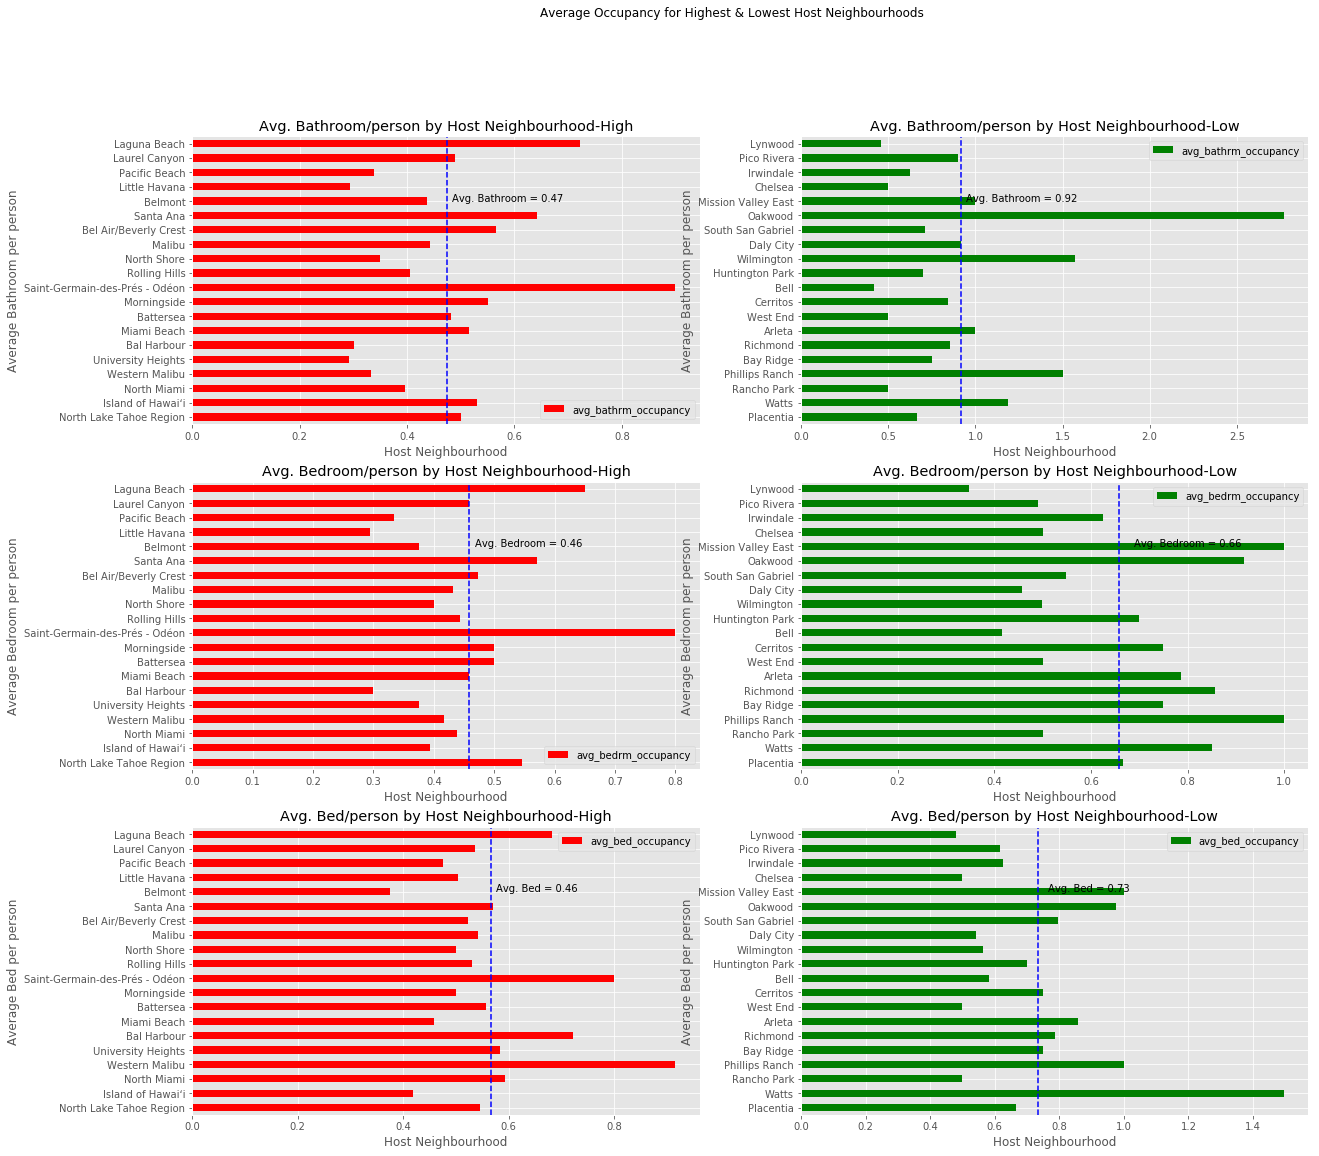

In [17]:
# Question 2

fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(nrows = 3, ncols = 2, figsize = (20,18), sharey = False)
fig.suptitle("Average Occupancy for Highest & Lowest Host Neighbourhoods")

df12_high.plot(kind = "barh", x = "host_neighbourhood", y = "avg_bathrm_occupancy", color = "r", ax = ax0)
ax0.set(title = "Avg. Bathroom/person by Host Neighbourhood-High", xlabel = "Host Neighbourhood", ylabel = "Average Bathroom per person")
mean_avg_high_bathrm_occupancy = df12_high.avg_bathrm_occupancy.mean()
ax0.axvline(mean_avg_high_bathrm_occupancy, color = "b", linestyle = "--")
text0 = "Avg. Bathroom = %0.2f"%mean_avg_high_bathrm_occupancy
ax0.annotate(text0, xy = (mean_avg_high_bathrm_occupancy+0.01,15))

df12_low.plot(kind = "barh", x = "host_neighbourhood", y = "avg_bathrm_occupancy", color = "g", ax = ax1)
ax1.set(title = "Avg. Bathroom/person by Host Neighbourhood-Low", xlabel = "Host Neighbourhood", ylabel = "Average Bathroom per person")
mean_avg_low_bathrm_occupancy = df12_low.avg_bathrm_occupancy.mean()
ax1.axvline(mean_avg_low_bathrm_occupancy, color = "b", linestyle = "--")
text1 = "Avg. Bathroom = %0.2f"%mean_avg_low_bathrm_occupancy
ax1.annotate(text1, xy = (mean_avg_low_bathrm_occupancy+0.03,15))

df12_high.plot(kind = "barh", x = "host_neighbourhood", y = "avg_bedrm_occupancy", color = "r", ax = ax2)
ax2.set(title = "Avg. Bedroom/person by Host Neighbourhood-High", xlabel = "Host Neighbourhood", ylabel = "Average Bedroom per person")
mean_avg_high_bedrm_occupancy = df12_high.avg_bedrm_occupancy.mean()
ax2.axvline(mean_avg_high_bedrm_occupancy, color = "b", linestyle = "--")
text2 = "Avg. Bedroom = %0.2f"%mean_avg_high_bedrm_occupancy
ax2.annotate(text2, xy = (mean_avg_high_bedrm_occupancy+0.01,15))

df12_low.plot(kind = "barh", x = "host_neighbourhood", y = "avg_bedrm_occupancy", color = "g", ax = ax3)
ax3.set(title = "Avg. Bedroom/person by Host Neighbourhood-Low", xlabel = "Host Neighbourhood", ylabel = "Average Bedroom per person")
mean_avg_low_bedrm_occupancy = df12_low.avg_bedrm_occupancy.mean()
ax3.axvline(mean_avg_low_bedrm_occupancy, color = "b", linestyle = "--")
text3 = "Avg. Bedroom = %0.2f"%mean_avg_low_bedrm_occupancy
ax3.annotate(text3, xy = (mean_avg_low_bedrm_occupancy+0.03,15))

df12_high.plot(kind = "barh", x = "host_neighbourhood", y = "avg_bed_occupancy", color = "r", ax = ax4)
ax4.set(title = "Avg. Bed/person by Host Neighbourhood-High", xlabel = "Host Neighbourhood", ylabel = "Average Bed per person")
mean_avg_high_bed_occupancy = df12_high.avg_bed_occupancy.mean()
ax4.axvline(mean_avg_high_bed_occupancy, color = "b", linestyle = "--")
text4 = "Avg. Bed = %0.2f"%mean_avg_high_bedrm_occupancy
ax4.annotate(text4, xy = (mean_avg_high_bed_occupancy+0.01,15))

df12_low.plot(kind = "barh", x = "host_neighbourhood", y = "avg_bed_occupancy", color = "g", ax = ax5)
ax5.set(title = "Avg. Bed/person by Host Neighbourhood-Low", xlabel = "Host Neighbourhood", ylabel = "Average Bed per person")
mean_avg_low_bed_occupancy = df12_low.avg_bed_occupancy.mean()
ax5.axvline(mean_avg_low_bed_occupancy, color = "b", linestyle = "--")
text5 = "Avg. Bed = %0.2f"%mean_avg_low_bed_occupancy
ax5.annotate(text5, xy = (mean_avg_low_bed_occupancy+0.03,15))

In [18]:
# Question 3

dfl["room_type"] = dfl["room_type"].astype(str)
dfl["room_type"] = [x.replace(' ','_').replace('/','_') for x in dfl["room_type"]]

dfl13_Entire_home_apt = sqldf('SELECT host_neighbourhood, room_type FROM dfl WHERE room_type = "Entire_home_apt"')
dfl13_Entire_home_apt = sqldf('SELECT host_neighbourhood, COUNT(room_type) AS num_of_Entire_home_apt \
                               FROM dfl13_Entire_home_apt GROUP BY host_neighbourhood')

df13_Entire_home_apt_high = high_results.merge(dfl13_Entire_home_apt, how = "left", on = "host_neighbourhood")
df13_Entire_home_apt_high

,host_neighbourhood,average_total_price,num_of_Entire_home_apt
0,North Lake Tahoe Region,7683.000000,1
1,Island of Hawaiʻi,6603.750000,11
2,North Miami,5340.000000,6
3,Western Malibu,5000.000000,1
4,University Heights,4272.500000,2
5,Bal Harbour,3479.500000,2
6,Miami Beach,3389.175000,40
7,Battersea,3308.625000,8
8,Morningside,3100.000000,1
9,Saint-Germain-des-Prés - Odéon,2805.000000,1


In [19]:
# Question 3

df13_Entire_home_apt_low = low_results.merge(dfl13_Entire_home_apt, how = "left", on = "host_neighbourhood")
df13_Entire_home_apt_low

,host_neighbourhood,average_total_price,num_of_Entire_home_apt
0,Placentia,35.666667,NaN
1,Watts,39.000000,3.0
2,Rancho Park,60.000000,NaN
3,Phillips Ranch,62.000000,NaN
4,Bay Ridge,65.000000,NaN
5,Richmond,67.357143,NaN
6,Arleta,68.500000,1.0
7,West End,69.000000,NaN
8,Cerritos,69.214286,NaN
9,Bell,74.000000,1.0


In [20]:
# Question 3

dfl13_Private_room = sqldf('SELECT host_neighbourhood, room_type FROM dfl WHERE room_type = "Private_room"')
dfl13_Private_room = sqldf('SELECT host_neighbourhood, COUNT(room_type) AS num_of_Private_room \
                            FROM dfl13_Private_room GROUP BY host_neighbourhood')

df13_Private_room_high = high_results.merge(dfl13_Private_room, how = "left", on = "host_neighbourhood")
df13_Private_room_high

,host_neighbourhood,average_total_price,num_of_Private_room
0,North Lake Tahoe Region,7683.000000,NaN
1,Island of Hawaiʻi,6603.750000,NaN
2,North Miami,5340.000000,NaN
3,Western Malibu,5000.000000,NaN
4,University Heights,4272.500000,NaN
5,Bal Harbour,3479.500000,NaN
6,Miami Beach,3389.175000,NaN
7,Battersea,3308.625000,NaN
8,Morningside,3100.000000,NaN
9,Saint-Germain-des-Prés - Odéon,2805.000000,NaN


In [21]:
# Question 3

df13_Private_room_low = low_results.merge(dfl13_Private_room, how = "left", on = "host_neighbourhood")
df13_Private_room_low

,host_neighbourhood,average_total_price,num_of_Private_room
0,Placentia,35.666667,3
1,Watts,39.000000,5
2,Rancho Park,60.000000,1
3,Phillips Ranch,62.000000,1
4,Bay Ridge,65.000000,2
5,Richmond,67.357143,14
6,Arleta,68.500000,5
7,West End,69.000000,1
8,Cerritos,69.214286,16
9,Bell,74.000000,3


Text(6.9, 15, 'Avg. Private_room = 6.50')

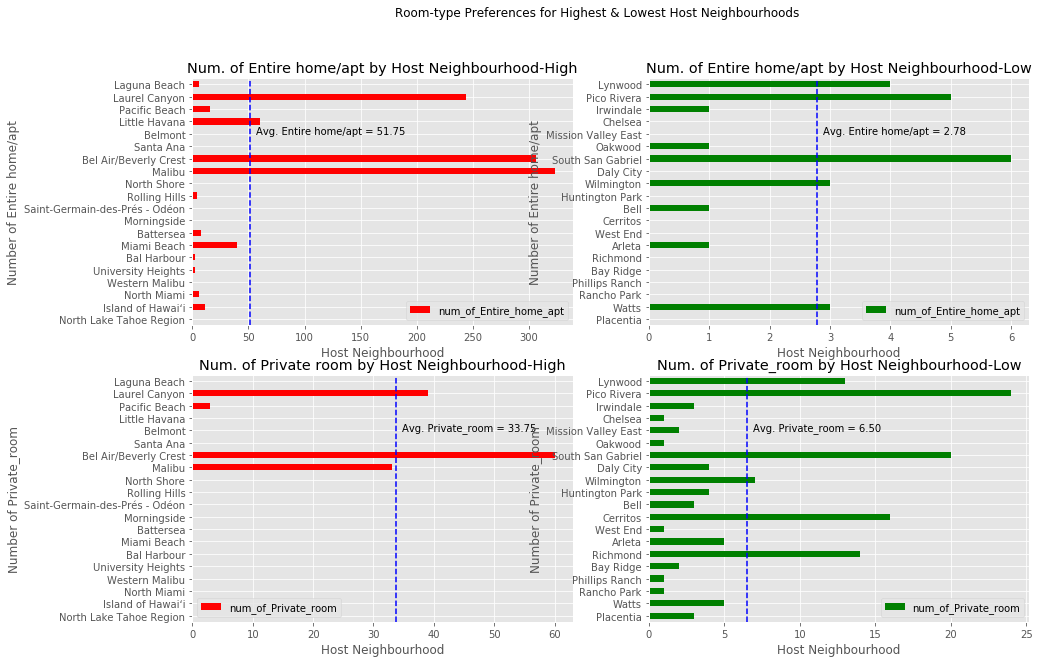

In [22]:
# Question 3

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10), sharey = False)
fig.suptitle("Room-type Preferences for Highest & Lowest Host Neighbourhoods")

df13_Entire_home_apt_high.plot(kind = "barh", x = "host_neighbourhood", y = "num_of_Entire_home_apt", color = "r", ax = ax0)
ax0.set(title = "Num. of Entire home/apt by Host Neighbourhood-High", xlabel = "Host Neighbourhood", ylabel = "Number of Entire home/apt")
mean_high_Entire_home_apt = df13_Entire_home_apt_high.num_of_Entire_home_apt.mean()
ax0.axvline(mean_high_Entire_home_apt, color = "b", linestyle = "--")
text0 = "Avg. Entire home/apt = %0.2f"%mean_high_Entire_home_apt
ax0.annotate(text0, xy = (mean_high_Entire_home_apt+5,15))

df13_Entire_home_apt_low.plot(kind = "barh", x = "host_neighbourhood", y = "num_of_Entire_home_apt", color = "g", ax = ax1)
ax1.set(title = "Num. of Entire home/apt by Host Neighbourhood-Low", xlabel = "Host Neighbourhood", ylabel = "Number of Entire home/apt")
mean_low_Entire_home_apt = df13_Entire_home_apt_low.num_of_Entire_home_apt.mean()
ax1.axvline(mean_low_Entire_home_apt, color = "b", linestyle = "--")
text1 = "Avg. Entire home/apt = %0.2f"%mean_low_Entire_home_apt
ax1.annotate(text1, xy = (mean_low_Entire_home_apt+0.1,15))

df13_Private_room_high.plot(kind = "barh", x = "host_neighbourhood", y = "num_of_Private_room", color = "r", ax = ax2)
ax2.set(title = "Num. of Private room by Host Neighbourhood-High", xlabel = "Host Neighbourhood", ylabel = "Number of Private_room")
mean_high_Private_room = df13_Private_room_high.num_of_Private_room.mean()
ax2.axvline(mean_high_Private_room, color = "b", linestyle = "--")
text2 = "Avg. Private_room = %0.2f"%mean_high_Private_room
ax2.annotate(text2, xy = (mean_high_Private_room+1,15))

df13_Private_room_low.plot(kind = "barh", x = "host_neighbourhood", y = "num_of_Private_room", color = "g", ax = ax3)
ax3.set(title = "Num. of Private_room by Host Neighbourhood-Low", xlabel = "Host Neighbourhood", ylabel = "Number of Private_room")
mean_low_Private_room = df13_Private_room_low.num_of_Private_room.mean()
ax3.axvline(mean_low_Private_room, color = "b", linestyle = "--")
text3 = "Avg. Private_room = %0.2f"%mean_low_Private_room
ax3.annotate(text3, xy = (mean_low_Private_room+0.4,15))

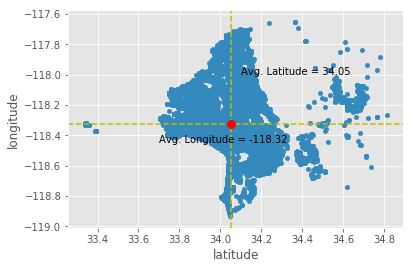

In [23]:
# Question 4

fig, ax = plt.subplots()
dfl.plot(kind = "scatter", x = "latitude", y = "longitude", ax = ax)
mean_latitude = dfl.latitude.mean()
mean_longitude = dfl.longitude.mean()
ax.axvline(mean_latitude, color = "y", linestyle = "--")
ax.axhline(mean_longitude, color = "y", linestyle = "--")
text0 = "Avg. Latitude = %0.2f"%mean_latitude
text1 = "Avg. Longitude = %0.2f"%mean_longitude
ax.annotate(text0, xy = (34.1,-118.0))
ax.annotate(text1, xy = (33.7,-118.45))

plt.plot([mean_latitude], [mean_longitude], marker = 'o', markersize = 8, color = "red")

In [24]:
# Question 5

dfr = pd.read_csv("reviews.csv")
dfr15_comments = sqldf('SELECT reviewer_name, COUNT(comments) AS num_of_comments\
                            FROM dfr WHERE reviewer_name != "None" GROUP BY reviewer_name')

from datetime import datetime as dt
dfr["date"] = pd.to_datetime(dfr["date"])
dfr15_date = dfr.groupby('reviewer_name').agg(['min','max'])['date']
dfr15_date['time_span'] = (dfr15_date['max'] - dfr15_date['min']).dt.days
dfr15 = dfr15_comments.merge(dfr15_date, how = "left", on = "reviewer_name")

In [25]:
# Question 5

review_activity = {}
for item,row in dfr15.iterrows():
    if row['time_span'] != 0:
        review_activity[row['reviewer_name']] = int(row['num_of_comments'])/int(row['time_span'])
    else:
        review_activity[row['reviewer_name']] = 0

df_review_activity = pd.DataFrame([review_activity]) 
df_review_activity = df_review_activity.transpose()
df_review_activity = df_review_activity.reset_index()
df_review_activity.columns = ['reviewer_name', 'review_activity']

Text(2.65365051909873, 4, 'Avg. Review Activity = 2.55')

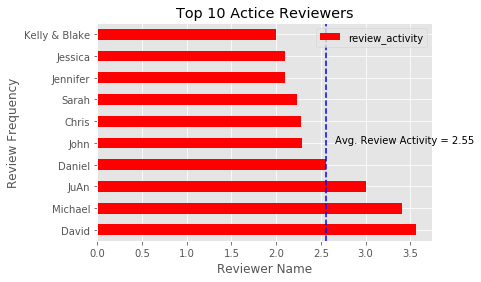

In [26]:
# Question 5

df15 = dfr15.merge(df_review_activity, how = "left", on = "reviewer_name")
df15_active = df15.sort_values(by = "review_activity", ascending = False)[:10]

fig, ax = plt.subplots()
df15_active.plot(kind = "barh", x = "reviewer_name", y = "review_activity", color = "r", ax = ax)
ax.set(title = "Top 10 Actice Reviewers", xlabel = "Reviewer Name", ylabel = "Review Frequency")
mean_active_review = df15_active.review_activity.mean()
ax.axvline(mean_active_review, color = "b", linestyle = "--")
text0 = "Avg. Review Activity = %0.2f"%mean_active_review
ax.annotate(text0, xy = (mean_active_review+0.1,4))

## Executive Summary

**Question 1 Answer:**
1. 20 host neighbourhoods with the highest total housing prices:
['University Heights', 'Island of Hawaiʻi', 'North Miami', 'Miami Beach', 'Battersea', 'Morningside', 'Malibu', 'Bel Air/Beverly Crest', 'Dana Point', 'Santa Ana', 'Belmont', 'Little Havana', 'Laurel Canyon', 'Laguna Beach', 'West Village', 'Ala Moana/Kakaako', 'Midtown', 'Kauaʻi', 'Marina Del Rey', 'El Segundo'].

2. 20 host neighbourhoods with the lowest total housing prices:
['Watts', 'Rancho Park', 'Bay Ridge', 'Arleta', 'West End', 'Oakwood', 'Chelsea', 'Westmont', 'Wilmington', 'Florence-Graham', 'San Juan Capistrano', 'Monterey Hills', 'South Fort Worth', 'Panorama City', 'LB of Hackney', 'Back Bay', 'Yangpu', 'North Hills', 'Lakeside', 'Washington Heights'].

**Question 2 Answer:**     
None of the factors (Bathroom/person, Bedroom/person or Bed/person) explains the price differennce in those host neighbourhoods.

It can be witnessed from the charts that host neighbourhoods with lower total housing prices would provide larger bathroom/bedroom/bed occupancy, even though they charge less than host neighbourhoods with higher total housing prices.

**Question 3 Answer:**     
The room_type could be a variable that to some extent explains the price difference.

From the comparable diagrams, we can see that host neighbourhoods with higher total housing prices would offer more entire rooms/apartments than private rooms, while host neighbourhoods with lower total housing prices are doing in a converse way.

**Question 4 Answer:**
1. Airbnb in LA has its footprint mostly spreading over the latitude ranging from 33.9 to 34.35, and the longitude ranging from -118.65 to -118.15.

2. Airbnb has its geogrophical concentration in LA at the coordinate of (34.08, -118.36) i.e. 34.08 in latitude and -118.36 in longitude.

**Question 5 Answer:**     
The top 10 active reviewers are listed here in the descending order of their participation/activity:
['David', 'Michael', 'JuAn', 'Daniel', 'John', 'Chris', 'Sarah', 'Jennifer', 'Jessica', 'Kelly & Blake'].
